In [2]:
#libraries
import numpy as np
import pandas as pd


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
import joblib

In [6]:
# read the data files

In [7]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')
sub = pd.read_csv('sample_submission_M0L0uXE.csv')

In [8]:
# to see the no.of features and observations
train.shape, test.shape, sub.shape

((54808, 14), (23490, 13), (23490, 2))

In [9]:
# to check the missing values
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [11]:
# to see the column names and its datatype
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [12]:
# idenitify cols
tgt_col = ['is_promoted']
ign_cols = ['employee_id']
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [14]:
print(tgt_col, ign_cols, cat_cols, num_cols,sep='\n')

['is_promoted']
['employee_id']
Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')
Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [16]:
train[cat_cols].head(2)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other


In [17]:
train[num_cols].head(2)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0


In [19]:
# to see numerical columns after removing the target columns and not required columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
train[num_cols].head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60


In [20]:
# create pipeline to do preprocessing of category columns
cat_pipe_encode = Pipeline(
    steps = [
        ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
        ('ohe',OneHotEncoder(handle_unknown='ignore')) # category encoding
    ]
)

In [21]:
# create piplene to perform preprocessing of numerical columns
num_pipe_encode = Pipeline(
    steps = [
        ('impute_num',SimpleImputer(strategy='median')), # impute missing values
        ('scale', StandardScaler())  # standard scaler
    ]
)

In [22]:
# create map b/w the pipeline and the columns 
preprocess = ColumnTransformer(
    transformers = [
        ('cat_encode', cat_pipe_encode, cat_cols),  # categorical columns
        ('num_encode', num_pipe_encode, num_cols)   # numerical columns
    ]
)

In [23]:
# create object for the LogisticRegeression algo
mymodel = LogisticRegression()

In [26]:
# merging the preprocessing and modelling in a pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocess), #preprocessing
        ('model', mymodel)  #modelling
    ]
)

In [27]:
# split the train dataset to train and validation
X = train.drop(columns = ign_cols + tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [28]:
y = train[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


In [30]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((49327, 12), (5481, 12), (49327, 1), (5481, 1))

In [33]:
train.shape, int(train.shape[0]*.9), int(train.shape[0]*.1)

((54808, 14), 49327, 5480)

In [39]:
# induded few more libraries

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score

In [37]:
# fit the model
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [38]:
# perform prediction with train itself
model_pipeline.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# method to perform train and validation prediction witt f1 score evaluation
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):
    pred_train = model_pipeline.predict(train_X)
    pred_val = model_pipeline.predict(val_X)
    
    print('Train F1 score:', f1_score(train_y, pred_train))
    print('Val   F1 score:', f1_score(val_y, pred_val))

In [43]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

Train F1 score: 0.39556905485081295
Val   F1 score: 0.4020979020979021


In [44]:
sub.head(2)

,employee_id,is_promoted
0,8724,0
1,74430,0


In [45]:
sub['is_promoted'] = model_pipeline.predict(test)
sub.to_csv('submmission1.csv',index=False)

In [ ]:
# create a docker hub account

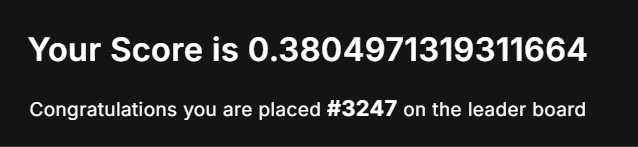

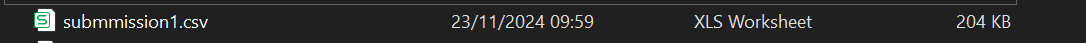

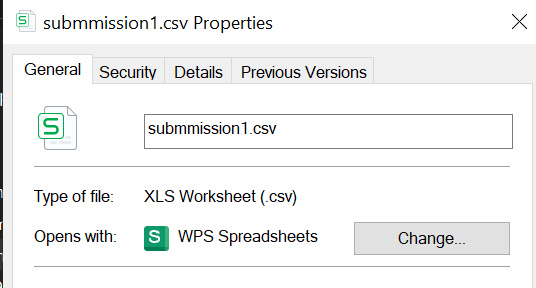

In [46]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [47]:
# create the pickle file
joblib.dump(model_pipeline, 'promote_pipeline_model.pkl')

['promote_pipeline_model.pkl']

In [52]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [51]:
train.columns.to_frame().index

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [53]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
